In [1]:
import os

In [2]:
os.getcwd()

'E:\\NLP-&-DL\\Github_Repos\\AnlyticsVidya_Hackathon'

In [3]:
data_dir = "E:\\NLP-&-DL\\Github_Repos\\AnlyticsVidya_Hackathon\\Sorted_Image_Data"

In [4]:
os.listdir(data_dir)

['Test', 'Train']

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [6]:
train_path = data_dir+'\\Train\\'
test_path = data_dir+'\\Test\\'

In [7]:
os.listdir(train_path)

['Class_0', 'Class_1']

In [8]:
os.listdir(train_path+'Class_0')[2]

'1005.jpg'

In [9]:
class0_img = train_path+'Class_0\\'+'1005.jpg'

In [10]:
imread(class0_img).shape

(224, 224, 3)

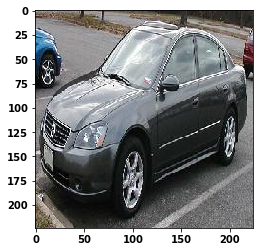

In [11]:
plt.imshow(imread(class0_img))

In [12]:
os.listdir(train_path+'Class_1')[0]

'0.jpg'

In [13]:
class1_img = class0_img = train_path+'Class_1\\'+'0.jpg'

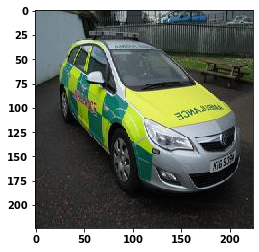

In [14]:
plt.imshow(imread(class1_img))

In [15]:
len(os.listdir(train_path+'Class_0'))

965

In [16]:
len(os.listdir(train_path+'Class_1'))

681

In [17]:
len(os.listdir(test_path+'Test_Images'))

706

### For finding average size of an image

In [18]:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path+'Test_Images'):
    
    img = imread(test_path+'Test_Images\\'+image_filename)
    d1,d2,d3 = img.shape
    dim1.append(d1)
    dim2.append(d2)

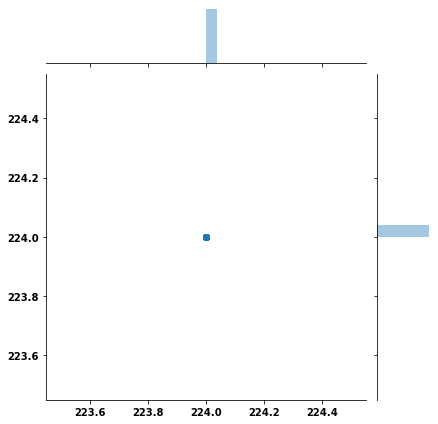

In [19]:
sns.jointplot(dim1,dim2)

In [20]:
np.mean(dim1)

224.0

In [21]:
np.mean(dim2)

224.0

In [22]:
image_shape = (224,224,3) 

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [24]:
imread(class0_img).max() # Not sclaed

255

In [25]:
image_gen = ImageDataGenerator(rescale=1/255,
                               rotation_range=20,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest',
                               validation_split=0.2) 

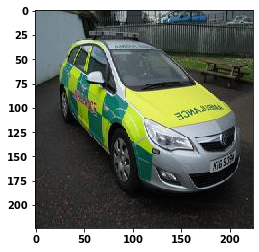

In [26]:
plt.imshow(imread(class0_img))

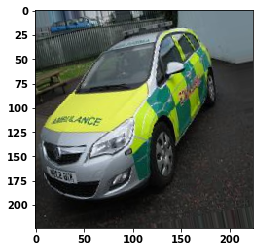

In [29]:
plt.imshow(image_gen.random_transform(imread(class0_img)))

In [30]:
train_path

'E:\\NLP-&-DL\\Github_Repos\\AnlyticsVidya_Hackathon\\Sorted_Image_Data\\Train\\'

In [31]:
image_gen.flow_from_directory(train_path)

Found 1646 images belonging to 2 classes.


In [32]:
image_gen.flow_from_directory(test_path)

Found 706 images belonging to 1 classes.


In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten

In [34]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [59]:
model = Sequential()

model.add(Conv2D(filters=6,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=16,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [60]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 222, 222, 6)       168       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 6)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 109, 109, 16)      880       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 46656)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               5598840   
_________________________________________________________________
dropout (Dropout)            (None, 120)              

In [61]:
batch_size = 4

In [62]:
image_shape[:2]

(224, 224)

In [63]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                             target_size=image_shape[:2],
                                             color_mode='rgb',
                                             batch_size=batch_size,
                                             class_mode='binary',
                                             subset='training')

validation_image_gen = image_gen.flow_from_directory(train_path,
                                             target_size=image_shape[:2],
                                             color_mode='rgb',
                                             batch_size=batch_size,
                                             class_mode='binary',
                                             subset='validation')

Found 1317 images belonging to 2 classes.
Found 329 images belonging to 2 classes.


In [64]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                             target_size=image_shape[:2],
                                             color_mode='rgb',
                                             class_mode='binary',
                                             shuffle=False)

Found 706 images belonging to 1 classes.


In [65]:
train_image_gen.class_indices

{'Class_0': 0, 'Class_1': 1}

In [66]:
model.fit(train_image_gen,epochs=4,validation_data = validation_image_gen)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 330 steps, validate for 83 steps
Epoch 1/4
330/330 [==============================] - 19s 58ms/step - loss: 0.7549 - accuracy: 0.6758 - val_loss: 0.6362 - val_accuracy: 0.6657
Epoch 2/4
330/330 [==============================] - 19s 57ms/step - loss: 0.5747 - accuracy: 0.7259 - val_loss: 0.5115 - val_accuracy: 0.7538
Epoch 3/4
330/330 [==============================] - 19s 57ms/step - loss: 0.5518 - accuracy: 0.7563 - val_loss: 0.5238 - val_accuracy: 0.7660
Epoch 4/4
330/330 [==============================] - 19s 57ms/step - loss: 0.5380 - accuracy: 0.7418 - val_loss: 0.4677 - val_accuracy: 0.7720


### Now Training on entire training set

In [67]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                             target_size=image_shape[:2],
                                             color_mode='rgb',
                                             batch_size=batch_size,
                                             class_mode='binary')

Found 1646 images belonging to 2 classes.


In [68]:
model.fit(train_image_gen,epochs=4)

  ...
    to  
  ['...']
Train for 412 steps
Epoch 1/4
412/412 [==============================] - 19s 47ms/step - loss: 0.5012 - accuracy: 0.7637
Epoch 2/4
412/412 [==============================] - 19s 47ms/step - loss: 0.4793 - accuracy: 0.76790s - loss: 0.4
Epoch 3/4
412/412 [==============================] - 21s 50ms/step - loss: 0.4750 - accuracy: 0.7783
Epoch 4/4
412/412 [==============================] - 23s 55ms/step - loss: 0.4776 - accuracy: 0.7947


### Making Predictions

In [69]:
pred = model.predict(test_image_gen)

In [71]:
#pred

In [72]:
predictions = pred>0.5 

In [77]:
predictions.shape

(706, 1)

In [78]:
predictions = predictions.reshape(706)

In [81]:
predictions = predictions.astype(int)

In [82]:
#predictions

In [84]:
img_list = []

for imgs in os.listdir("Sorted_Image_Data/Test/Test_Images/"):
    img = imgs
    img_list.append(img)    

In [86]:
#img_list

In [87]:
submission_df = pd.DataFrame(img_list,columns=['image_names'])

In [88]:
submission_df.head()

,image_names
0,100.jpg
1,1000.jpg
2,1001.jpg
3,1004.jpg
4,1014.jpg


In [89]:
submission_df['emergency_or_not'] = predictions

In [90]:
submission_df.head()

,image_names,emergency_or_not
0,100.jpg,0
1,1000.jpg,0
2,1001.jpg,0
3,1004.jpg,0
4,1014.jpg,0


In [91]:
submission_df.set_index('image_names',inplace=True)

In [92]:
submission_df.head()

,emergency_or_not
image_names,
100.jpg,0
1000.jpg,0
1001.jpg,0
1004.jpg,0
1014.jpg,0


In [93]:
submission_df.to_csv('FirstSubmission.csv')

ON submitting to https://datahack.analyticsvidhya.com/contest/janatahack-computer-vision-hackathon/#SolutionChecker accuracy score came --> **0.743**